In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
df = pd.read_excel('stresslevel.xlsx')
df[['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']] = df[
    ['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']
].apply(pd.to_numeric, errors='coerce')


#Histogram

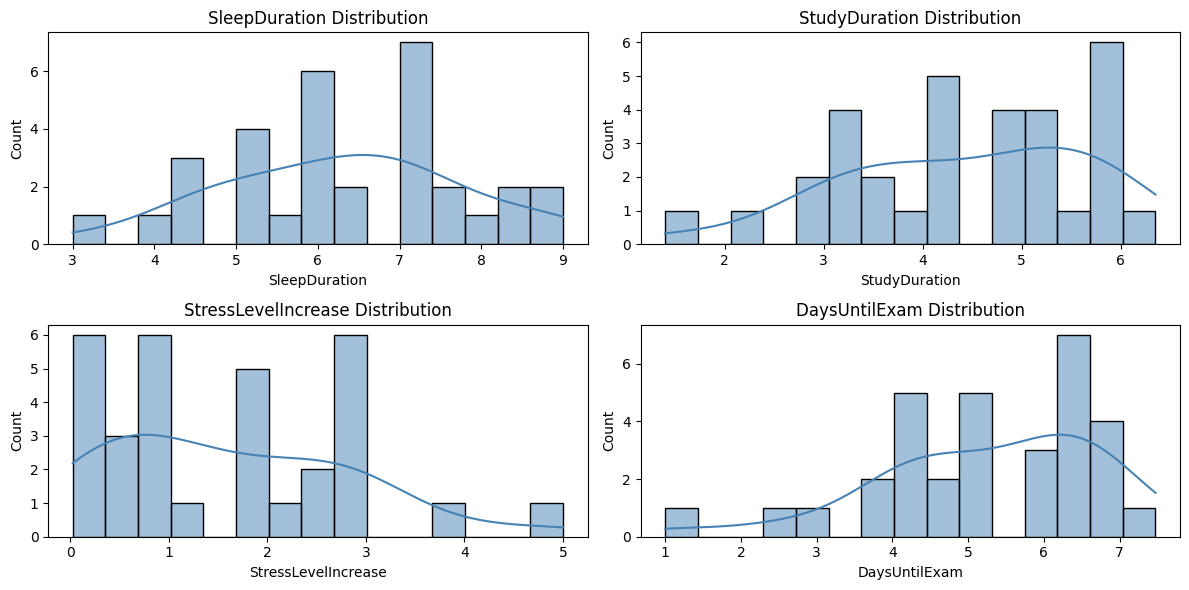

In [84]:

plt.figure(figsize=(12, 6))
for i, column in enumerate(['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[column], bins=15, kde=True, color='steelblue')
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()


#Boxplot 

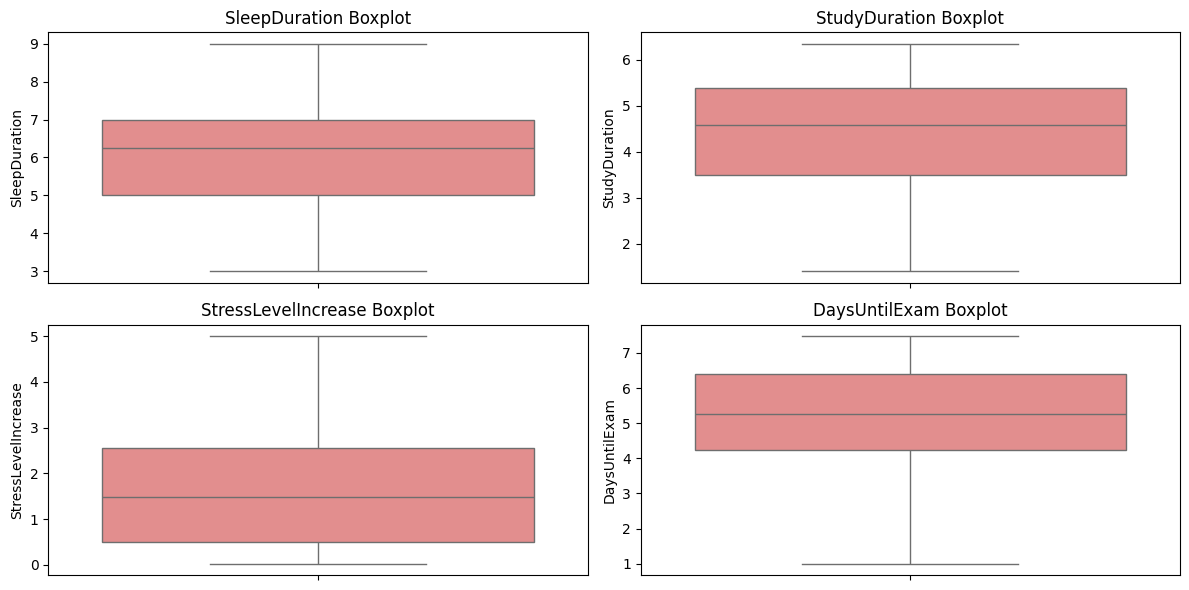

In [85]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[column], color='lightcoral')
    plt.title(f'{column} Boxplot')
plt.tight_layout()
plt.show()

#Scatterplot + Trendline 


<Figure size 1200x600 with 0 Axes>

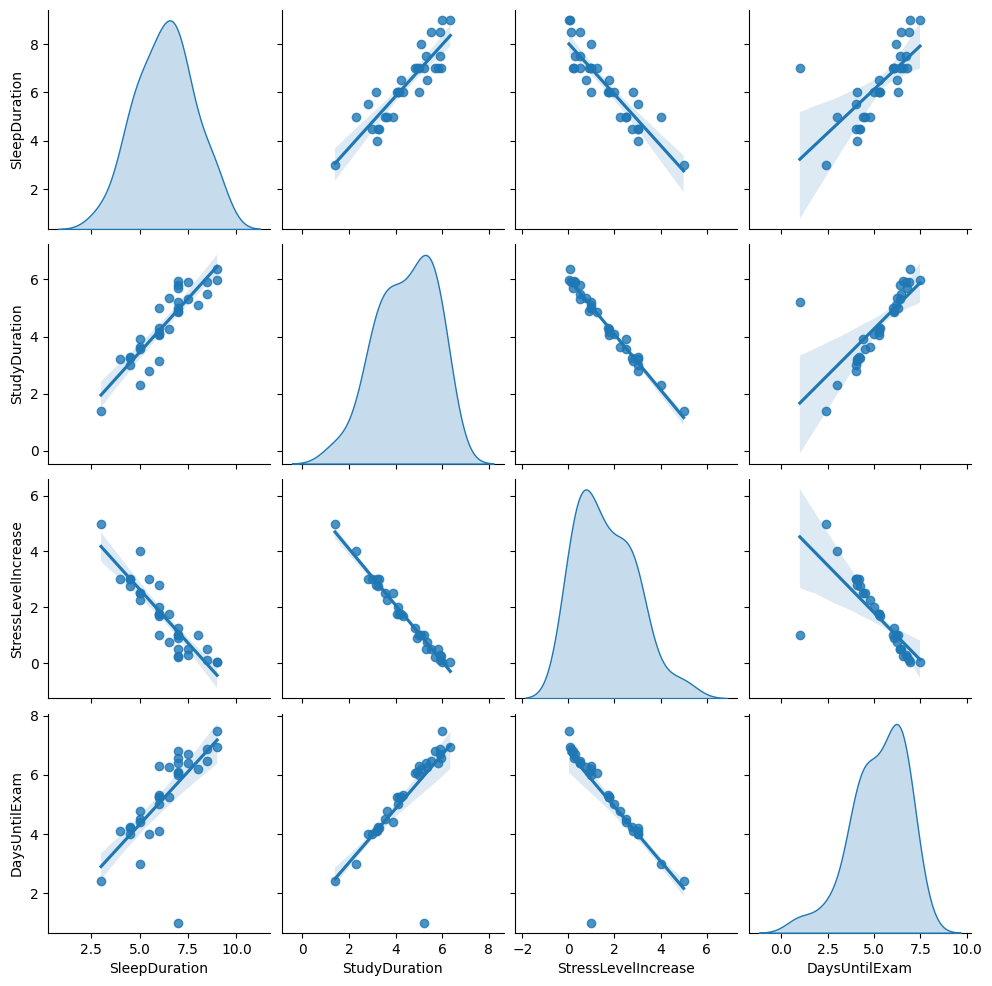

In [86]:
plt.figure(figsize=(12, 6))
sns.pairplot(df[['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']], kind='reg', diag_kind='kde')
plt.show()

#Heatmap

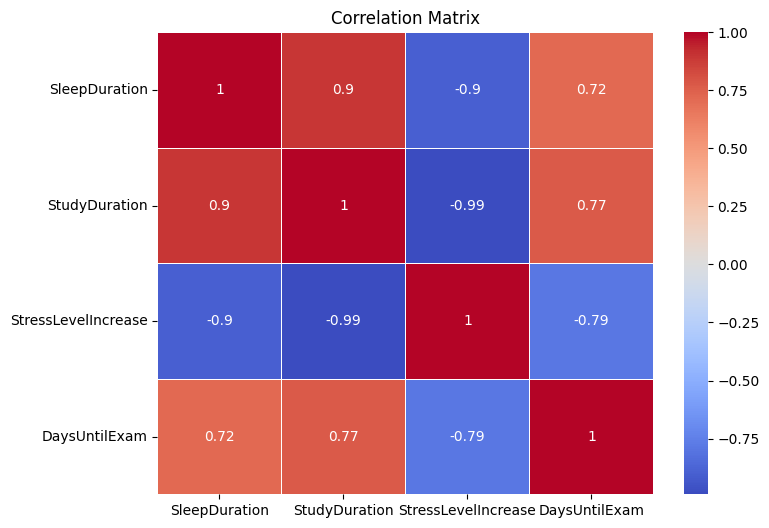

In [87]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#Regression Analysis


In [88]:
X = df[['SleepDuration', 'StudyDuration', 'DaysUntilExam']]
X = sm.add_constant(X)  # Sabit terimi ekle
y = df['StressLevelIncrease']

model = sm.OLS(y, X).fit()  # Modeli eğit
print(model.summary())  # Regresyon analizini yazdır

                             OLS Regression Results                            
Dep. Variable:     StressLevelIncrease   R-squared:                       0.983
Model:                             OLS   Adj. R-squared:                  0.981
Method:                  Least Squares   F-statistic:                     527.5
Date:                 Fri, 04 Apr 2025   Prob (F-statistic):           9.92e-25
Time:                         11:29:09   Log-Likelihood:                 12.547
No. Observations:                   32   AIC:                            -17.09
Df Residuals:                       28   BIC:                            -11.23
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.2637      0.143 

#Scatter Plot (Sleep Duration vs. Stress Level Increase)


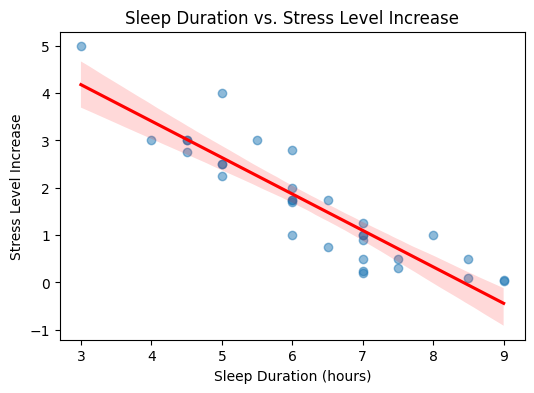

In [89]:
plt.figure(figsize=(6, 4))
sns.regplot(x=df['SleepDuration'], y=df['StressLevelIncrease'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Sleep Duration vs. Stress Level Increase')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Stress Level Increase')
plt.show()

#Scatter Plot (Study Duration vs. Stress Level Increase)

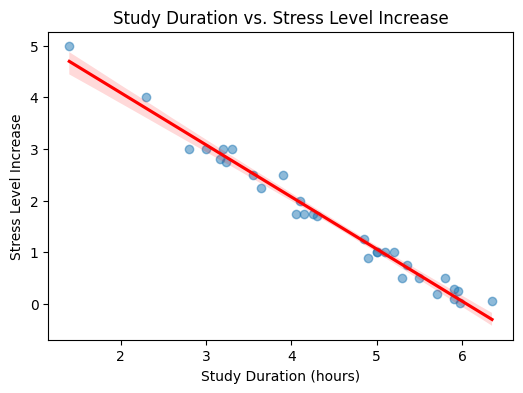

In [90]:
plt.figure(figsize=(6, 4))
sns.regplot(x=df['StudyDuration'], y=df['StressLevelIncrease'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Study Duration vs. Stress Level Increase')
plt.xlabel('Study Duration (hours)')
plt.ylabel('Stress Level Increase')
plt.show()

In [91]:
import pandas as pd
import scipy.stats as stats

# Load dataset
df = pd.read_excel("stresslevel.xlsx")

# Ensure numeric columns are correctly formatted
numeric_columns = ['StudyDuration', 'SleepDuration', 'StressLevelIncrease', 'DaysUntilExam']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Convert categorical variable IsExamDay to binary
df['IsExamDay'] = df['IsExamDay'].map({'Yes': 1, 'No': 0})

# Drop NaN values
df = df.dropna()

print("=== Hypothesis Testing ===\n")

def format_p(p):
    return "< 0.0001" if p < 0.0001 else f"{p:.6f}"

# 1. Mann-Whitney U Test
exam_days = df[df['IsExamDay'] == 1]['StressLevelIncrease']
non_exam_days = df[df['IsExamDay'] == 0]['StressLevelIncrease']
u_stat, p_u = stats.mannwhitneyu(exam_days, non_exam_days, alternative='two-sided')
print(f"📌 Mann-Whitney U Test (Stress Increase on Exam vs Non-Exam Days):")
print(f"   U = {u_stat:.3f}, p = {format_p(p_u)}")
print("   ✅ Significant" if p_u < 0.05 else "   ❌ Not significant", "\n")

# 2. Kruskal-Wallis Test
df['Route'] = df['Route'].astype(str)
groups = [group['StudyDuration'].dropna() for name, group in df.groupby('Route')]
h_stat, p_kruskal = stats.kruskal(*groups)
print(f"📌 Kruskal-Wallis Test (Study Duration by Route):")
print(f"   H = {h_stat:.3f}, p = {format_p(p_kruskal)}")
print("   ✅ Significant" if p_kruskal < 0.05 else "   ❌ Not significant", "\n")

# 3. Spearman Correlation (Sleep vs Stress)
rho_spearman_sleep, p_spearman_sleep = stats.spearmanr(df['SleepDuration'], df['StressLevelIncrease'])
print("📌 Spearman Correlation (Sleep Duration vs Stress Increase):")
print(f"   r = {rho_spearman_sleep:.3f}, p = {format_p(p_spearman_sleep)}")
print("   ✅ Significant" if p_spearman_sleep < 0.05 else "   ❌ Not significant", "\n")

# 4. Pearson Correlation (Sleep vs Stress)
rho_pearson_sleep, p_pearson_sleep = stats.pearsonr(df['SleepDuration'], df['StressLevelIncrease'])
print("📌 Pearson Correlation (Sleep Duration vs Stress Increase):")
print(f"   r = {rho_pearson_sleep:.3f}, p = {format_p(p_pearson_sleep)}")
print("   ✅ Significant" if p_pearson_sleep < 0.05 else "   ❌ Not significant", "\n")

# 5. Spearman Correlation (Study vs Stress)
rho_spearman_study, p_spearman_study = stats.spearmanr(df['StudyDuration'], df['StressLevelIncrease'])
print("📌 Spearman Correlation (Study Duration vs Stress Increase):")
print(f"   r = {rho_spearman_study:.3f}, p = {format_p(p_spearman_study)}")
print("   ✅ Significant" if p_spearman_study < 0.05 else "   ❌ Not significant", "\n")

# 6. Pearson Correlation (Study vs Stress)
rho_pearson_study, p_pearson_study = stats.pearsonr(df['StudyDuration'], df['StressLevelIncrease'])
print("📌 Pearson Correlation (Study Duration vs Stress Increase):")
print(f"   r = {rho_pearson_study:.3f}, p = {format_p(p_pearson_study)}")
print("   ✅ Significant" if p_pearson_study < 0.05 else "   ❌ Not significant")


=== Hypothesis Testing ===

📌 Mann-Whitney U Test (Stress Increase on Exam vs Non-Exam Days):
   U = 20.000, p = 0.014453
   ✅ Significant 

📌 Kruskal-Wallis Test (Study Duration by Route):
   H = 15.543, p = 0.001407
   ✅ Significant 

📌 Spearman Correlation (Sleep Duration vs Stress Increase):
   r = -0.915, p = < 0.0001
   ✅ Significant 

📌 Pearson Correlation (Sleep Duration vs Stress Increase):
   r = -0.901, p = < 0.0001
   ✅ Significant 

📌 Spearman Correlation (Study Duration vs Stress Increase):
   r = -0.984, p = < 0.0001
   ✅ Significant 

📌 Pearson Correlation (Study Duration vs Stress Increase):
   r = -0.990, p = < 0.0001
   ✅ Significant
